https://wikidocs.net/22886

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN

tf.enable_eager_execution()

### RNN

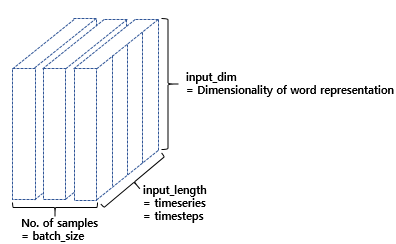

In [6]:
from IPython.display import Image
Image('https://wikidocs.net/images/page/22886/rnn_image6between7.PNG')

In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(SimpleRNN(3, input_shape = (2,10)))
#model.add(SimpleRNN(3, input_length = 2, input_dim=10))과 동일
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


헷갈리지 말아야할 점은 위의 코드는 출력층까지 포함한 하나의 완성된 인공 신경망 코드가 아니라 은닉층. 즉, RNN 층에 대한 코드라는 점입니다. 해당 코드가 리턴하는 결과값은 출력층의 결과가 아니라 하나의 은닉 상태 또는 정의하기에 따라 다수의 은닉 상태 입니다. 아래의 그림은 앞서 배운 출력층을 포함한 완성된 인공 신경망 그림과 은닉층까지만 표현한 그림의 차이를 보여줍니다.

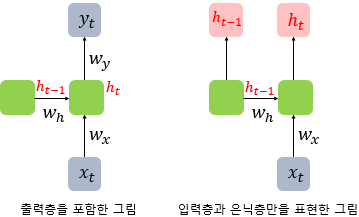

In [7]:
Image('https://wikidocs.net/images/page/22886/rnn_image7_ver2.PNG')

그렇다면 RNN 층은 위에서 설명한 입력 3D 텐서를 입력받아서 어떻게 은닉 상태를 출력할까요? RNN 층은 사용자의 설정에 따라 두 가지 종류의 출력을 내보냅니다. 메모리 셀의 최종 시점의 은닉 상태만을 리턴하고자 한다면 (batch_size, output_dim) 크기의 2D 텐서를 리턴합니다. 하지만, 메모리 셀의 각 시점(time-step)의 은닉 상태값들을 모아서 전체 시퀀스를 리턴하고자 한다면 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴합니다. 이는 RNN 층의 return_sequences 매개 변수에 True를 설정하여 설정이 가능합니다. (output_dim은 앞서 코드에서 정의한 hidden_size의 값으로 설정됩니다.)



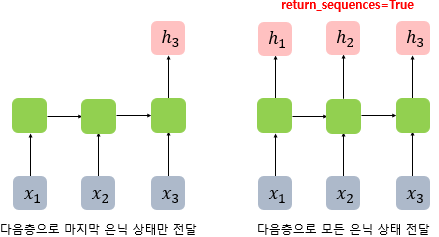

In [8]:
Image('https://wikidocs.net/images/page/22886/rnn_image8_ver2.PNG')

batch size를 미리 정의하지 않았기 때문에 (None, 3)

In [3]:
#batch_size를 미리 정의
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape = (8,2,10)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


return_sequences=True를 선택하면 메모리 셀이 모든 시점(time-step)에 대해서 은닉 상태값을 출력하며, 별도 기재하지 않거나 return_sequences=False로 선택할 경우에는 메모리 셀은 하나의 은닉 상태값만을 출력합니다. 그리고 이 하나의 값은 마지막 시점(time-step)의 메모리 셀의 은닉 상태값입니다.

마지막 은닉 상태만 전달하도록 하면 many-to-one 문제를 풀 수 있고, 모든 시점의 은닉 상태를 전달하도록 하면, 다음층에 은닉층이 하나 더 있는 경우이거나 many-to-many 문제를 풀 수 있습니다.

In [4]:
# 출력값으로 (batch_size, timesteps, output_dim) 크기의 3D 텐서를 리턴
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape = (8,2,10), return_sequences = True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


### 양방향 순환 신경망 Bidirectional Recurrent Neural Network)

양방향 RNN은 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용합니다. 첫번째 메모리 셀은 앞에서 배운 것처럼 앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산합니다. 두번째 메모리 셀은 앞에서 배운 것과는 다릅니다. 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산합니다. 그리고 이 두 개의 값 모두가 하나의 출력값을 예측하기 위해 사용됩니다.

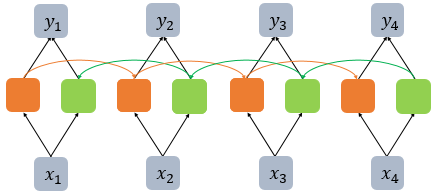

In [5]:

Image('https://wikidocs.net/images/page/22886/rnn_image5_ver2.PNG')

#### 가벼운 실습. 실제 모델 구현 목적보다는 모델링 이해를 위한 실습

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN
# tf.enable_eager_execution() 시작 때 수행되어야 함

In [8]:
train_X=[[0.1,4.2,1.5,1.1,2.8],[1.0,3.1,2.5,0.7,1.1],[0.3,2.1,1.5,.1,2],[2.2,1.4,.5,.9,1.1]]
np.shape(train_X)

(4, 5)

(input_length, input_dim)의 크기에 해당됨. 여기서 input_length는 곧 시점(timestep)

In [9]:
#RNN은 3D 텐서를 입력받기 때문에 3D텐서로 변경
train_X = [train_X]
train_X = np.array(train_X, dtype = np.float32)
train_X.shape

(1, 4, 5)

(batch_size(문장 개수), timesteps, input_dim)에 해당되는 (1,4,5) 의 크기를 가지는 3D 텐서 생성

In [27]:
rnn =SimpleRNN(3, return_sequences= True, return_state= True) # return_state : 마지막 은닉 상태를 리턴 / return_sequences : 모든 시점에 대해 을 리턴
hidden_states, last_states = rnn(train_X)
rnn(train_X)

[<tf.Tensor: id=2542, shape=(1, 4, 3), dtype=float32, numpy=
 array([[[-0.9998839 , -0.9504982 , -0.9998037 ],
         [-0.9796907 , -0.9817744 , -0.9999917 ],
         [-0.8708688 , -0.244085  , -0.99963355],
         [-0.8093793 , -0.99007994, -0.9997992 ]]], dtype=float32)>,
 <tf.Tensor: id=2528, shape=(1, 3), dtype=float32, numpy=array([[-0.8093793 , -0.99007994, -0.9997992 ]], dtype=float32)>]

In [13]:
rnn =SimpleRNN(3)
rnn(train_X)

<tf.Tensor: id=515, shape=(1, 3), dtype=float32, numpy=array([[-0.68355626, -0.617126  , -0.94395345]], dtype=float32)>

In [16]:
rnn=SimpleRNN(3, return_sequences= True)
rnn(train_X)

<tf.Tensor: id=689, shape=(1, 4, 3), dtype=float32, numpy=
array([[[0.9891739 , 0.9999545 , 0.99795514],
        [0.9962509 , 0.9999231 , 0.98900497],
        [0.93906444, 0.99960136, 0.8675098 ],
        [0.9980718 , 0.9992328 , 0.946656  ]]], dtype=float32)>

In [23]:
rnn2=SimpleRNN(3, return_sequences=False)
rnn2(train_X)

<tf.Tensor: id=1896, shape=(1, 3), dtype=float32, numpy=array([[ 0.14483131, -0.8721752 , -0.41330364]], dtype=float32)>

### RNN을 이용한 언어 모델링

In [48]:
#한국어 문장을 선언
text = "나랑 점심 먹으러 갈래 메뉴는 햄버거 점심 메뉴 좋지"

In [49]:
#토큰화와 정수 인코딩
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0] 
# [0]을 해주지 않으면 [[contents]]와 같이 리스트 안 리스트로 저장 됨 / [0]을 하면 [content]로 하나의 원소를 가진 리스트로 저장됨

In [50]:
vocab_size = len(t.word_index) + 1
#케라스 토크나이저의 정수 인코딩은 인덱스가 1부터 시작하지만, 원-핫 인코딩에서 배열의 인덱스가 0부터 시작하기 때문에
#배열의 크기를 실제 단어 집합 크기보다 +1로 생성해야 하므로 미리 +1 선언


In [51]:
t.word_index

{'점심': 1, '나랑': 2, '먹으러': 3, '갈래': 4, '메뉴는': 5, '햄버거': 6, '메뉴': 7, '좋지': 8}

In [52]:
#문장에서 두 개 단어씩 묶어주기 - 문장의 bigram을 추출한다고 봐도 무방함
sequences = list()
for c in range(1,len(encoded)) :
    sequence = encoded[c-1:c+1] # X, Y 관계를 구성하기 위해 단어를 두 개씩 묶어서 저장해줌
    sequences.append(sequence)

In [53]:
#출력
sequences

[[2, 1], [1, 3], [3, 4], [4, 5], [5, 6], [6, 1], [1, 7], [7, 8]]

In [54]:
#첫번째 열과 두번째 열을 X와 y에 저장하는 코드
import numpy as np
X, y = zip(*sequences) # 1st 열 : X, 2nd 열 : y  / 세 개 이상 원소를 가지는 경우, 각 열마다 하나의 리스트로 뭉쳐짐
X = np.array(X)
y = np.array(y)

In [55]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes = vocab_size) # 원-핫 인코딩
y

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [56]:
import tensorflow as tf
from keras.layers import Embedding, Dense, SimpleRNN
from keras.models import Sequential
tf.compat.v1.disable_eager_execution()

model = Sequential()
model.add(Embedding(vocab_size, 9, input_length = 1))
#단어 집합 크기 : 9,, 임베딩 벡터 크기 : 9 (크지 않아 동일하게 설정. 보통 더 적게 설정), 각 sample의 길이는 단어 한 개이므로 길이 1
model.add(SimpleRNN(5))
#RNN 결과값도 차원 9. 더 크게 해줘도 상관 없음
model.add(Dense(vocab_size, activation='softmax'))
#출력층을 지나 나오는 벡터의 크기도 9로 한다.


# SimpleRNN에 하나의 값을 인자로 줄 때, 이 값은 time-step이 아니라 hidden-size의 값, 즉 outuput_dim을 정의해준 숫자

In [57]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X, y, epochs = 500, verbose = 2)

Epoch 1/500
 - 1s - loss: 2.1992 - acc: 0.1250
Epoch 2/500
 - 0s - loss: 2.1963 - acc: 0.2500
Epoch 3/500
 - 0s - loss: 2.1934 - acc: 0.1250
Epoch 4/500
 - 0s - loss: 2.1905 - acc: 0.2500
Epoch 5/500
 - 0s - loss: 2.1876 - acc: 0.2500
Epoch 6/500
 - 0s - loss: 2.1848 - acc: 0.2500
Epoch 7/500
 - 0s - loss: 2.1819 - acc: 0.2500
Epoch 8/500
 - 0s - loss: 2.1791 - acc: 0.2500
Epoch 9/500
 - 0s - loss: 2.1762 - acc: 0.2500
Epoch 10/500
 - 0s - loss: 2.1733 - acc: 0.2500
Epoch 11/500
 - 0s - loss: 2.1705 - acc: 0.2500
Epoch 12/500
 - 0s - loss: 2.1676 - acc: 0.2500
Epoch 13/500
 - 0s - loss: 2.1647 - acc: 0.3750
Epoch 14/500
 - 0s - loss: 2.1618 - acc: 0.3750
Epoch 15/500
 - 0s - loss: 2.1589 - acc: 0.3750
Epoch 16/500
 - 0s - loss: 2.1559 - acc: 0.3750
Epoch 17/500
 - 0s - loss: 2.1530 - acc: 0.3750
Epoch 18/500
 - 0s - loss: 2.1500 - acc: 0.3750
Epoch 19/500
 - 0s - loss: 2.1470 - acc: 0.3750
Epoch 20/500
 - 0s - loss: 2.1440 - acc: 0.3750
Epoch 21/500
 - 0s - loss: 2.1410 - acc: 0.3750
E

Epoch 171/500
 - 0s - loss: 1.3953 - acc: 0.7500
Epoch 172/500
 - 0s - loss: 1.3901 - acc: 0.7500
Epoch 173/500
 - 0s - loss: 1.3849 - acc: 0.7500
Epoch 174/500
 - 0s - loss: 1.3797 - acc: 0.7500
Epoch 175/500
 - 0s - loss: 1.3746 - acc: 0.7500
Epoch 176/500
 - 0s - loss: 1.3695 - acc: 0.7500
Epoch 177/500
 - 0s - loss: 1.3644 - acc: 0.7500
Epoch 178/500
 - 0s - loss: 1.3593 - acc: 0.7500
Epoch 179/500
 - 0s - loss: 1.3543 - acc: 0.7500
Epoch 180/500
 - 0s - loss: 1.3493 - acc: 0.7500
Epoch 181/500
 - 0s - loss: 1.3442 - acc: 0.7500
Epoch 182/500
 - 0s - loss: 1.3393 - acc: 0.7500
Epoch 183/500
 - 0s - loss: 1.3343 - acc: 0.7500
Epoch 184/500
 - 0s - loss: 1.3293 - acc: 0.7500
Epoch 185/500
 - 0s - loss: 1.3244 - acc: 0.7500
Epoch 186/500
 - 0s - loss: 1.3195 - acc: 0.7500
Epoch 187/500
 - 0s - loss: 1.3146 - acc: 0.7500
Epoch 188/500
 - 0s - loss: 1.3097 - acc: 0.7500
Epoch 189/500
 - 0s - loss: 1.3048 - acc: 0.7500
Epoch 190/500
 - 0s - loss: 1.3000 - acc: 0.7500
Epoch 191/500
 - 0s 

Epoch 339/500
 - 0s - loss: 0.7319 - acc: 0.8750
Epoch 340/500
 - 0s - loss: 0.7290 - acc: 0.8750
Epoch 341/500
 - 0s - loss: 0.7262 - acc: 0.8750
Epoch 342/500
 - 0s - loss: 0.7234 - acc: 0.8750
Epoch 343/500
 - 0s - loss: 0.7205 - acc: 0.8750
Epoch 344/500
 - 0s - loss: 0.7178 - acc: 0.8750
Epoch 345/500
 - 0s - loss: 0.7150 - acc: 0.8750
Epoch 346/500
 - 0s - loss: 0.7122 - acc: 0.8750
Epoch 347/500
 - 0s - loss: 0.7095 - acc: 0.8750
Epoch 348/500
 - 0s - loss: 0.7067 - acc: 0.8750
Epoch 349/500
 - 0s - loss: 0.7040 - acc: 0.8750
Epoch 350/500
 - 0s - loss: 0.7013 - acc: 0.8750
Epoch 351/500
 - 0s - loss: 0.6986 - acc: 0.8750
Epoch 352/500
 - 0s - loss: 0.6959 - acc: 0.8750
Epoch 353/500
 - 0s - loss: 0.6933 - acc: 0.8750
Epoch 354/500
 - 0s - loss: 0.6906 - acc: 0.8750
Epoch 355/500
 - 0s - loss: 0.6880 - acc: 0.8750
Epoch 356/500
 - 0s - loss: 0.6854 - acc: 0.8750
Epoch 357/500
 - 0s - loss: 0.6828 - acc: 0.8750
Epoch 358/500
 - 0s - loss: 0.6802 - acc: 0.8750
Epoch 359/500
 - 0s 

In [59]:
model.predict(X)

array([[0.00256979, 0.8274486 , 0.00151399, 0.01444408, 0.01967066,
        0.04317044, 0.0172597 , 0.03563479, 0.03828797],
       [0.00679117, 0.04484701, 0.00631687, 0.43639392, 0.08080025,
        0.00412814, 0.0122248 , 0.36779165, 0.04070619],
       [0.00502335, 0.02052069, 0.0113963 , 0.05111485, 0.662641  ,
        0.00238852, 0.14927013, 0.09376051, 0.0038847 ],
       [0.01627569, 0.07024859, 0.01190672, 0.00117477, 0.00112039,
        0.80329955, 0.02813037, 0.00474252, 0.0631015 ],
       [0.02623983, 0.01352234, 0.02335316, 0.00935724, 0.1475742 ,
        0.05063564, 0.69703424, 0.02882266, 0.0034607 ],
       [0.00255992, 0.82756495, 0.00151065, 0.01461028, 0.01951721,
        0.04271834, 0.01692571, 0.03583818, 0.0387547 ],
       [0.00679117, 0.04484701, 0.00631687, 0.43639392, 0.08080025,
        0.00412814, 0.0122248 , 0.36779165, 0.04070619],
       [0.0208605 , 0.10249052, 0.02171944, 0.04031161, 0.00255108,
        0.04559111, 0.00275624, 0.0387997 , 0.7249198 ]],

In [62]:
y

array([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [28]:
t.word_index.items() # key와 value의 값을 쌍으로 튜플로 묶은 값을 리턴

dict_items([('점심', 1), ('나랑', 2), ('먹으러', 3), ('갈래', 4), ('메뉴는', 5), ('햄버거', 6), ('메뉴', 7), ('좋지', 8)])

다음 단어를 출력하는 함수를 작성

In [29]:
def predict_next_word(model, t, current_word) :
    encoded = t.texts_to_sequences([current_word])[0]
    encoded = np.array(encoded)
    result = model.predict_classes(encoded, verbose=0)
    for word, index in t.word_index.items() :
        if index == result :
            return word

In [32]:
predict_next_word(model, t, '먹으러')

'갈래'

방금 실습했던 함수를 for문과 조합하여 반복하도록 만들어 문장을 생성하는 함수 작성

In [33]:
def sentence_generation(model, t, current_word, n) :
    init_word = current_word
    sentence = ''
    for _ in range(n) : #n번 반복
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = np.array(encoded)
        result = model.predict_classes(encoded, verbose = 0)
        for word, index in t.word_index.items() :
            if index == result :
                break
        current_word = word
        sentence = sentence + ' ' + word
    sentence = init_word + sentence
    return sentence

In [34]:
sentence_generation(model, t, '점심', 9)

'점심 먹으러 갈래 메뉴는 햄버거 점심 먹으러 갈래 메뉴는 햄버거'

- 앞선 모델은 훈련 데이터에 '점심' 다음에 '먹으러'와 '메뉴'라는 단어가 한 번씩 나옴에 따라 어떤 단어를 선택할지 헷갈리는 모습을 보여줌
- 다음 단어 등장 횟수가 같다고 해서 헷갈린다는 것은, 해당 모델이 문맥을 전혀 반영하지 못하는 모델이라는 것을 의미


--> 대안은 모델이 문맥을 학습할 수 있도록 앞의 단어들도 함께 학습시키는 것. 
- 즉, 이전 모델처럼 현재 단어 + 다음 단어의 쌍(pair)을 X와 y로 훈련시키는 것이 아니라, 앞에 등장한 모든 단어의 시퀀스를 X로 학습시킴

In [70]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다"""

토큰화와 정수 인코딩

In [71]:
t = Tokenizer()
t.fit_on_texts([text])
encoded = t.texts_to_sequences([text])[0]

In [72]:
encoded

[2, 3, 1, 4, 5, 6, 1, 7, 8, 1, 9, 10, 1, 11]

In [73]:
vocab_size = len(t.word_index) + 1
t.word_index

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [74]:
#훈련 데이터 만들기
sequences = list()
for line in text.split('\n') :
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)) :
        sequence = encoded[:i+1]
        sequences.append(sequence)
print('훈련 데이터의 개수 : %d' % len(sequences))

훈련 데이터의 개수 : 11


In [75]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

모든 훈련 데이터에 대해 맨 우측에 있는 단어에 대해서만 y로 분리하면 X와 y의 쌍이 됨

In [76]:
#X와 y를 분리하기 전 모든 데이터의 길이를 맞춰야 함.
max(len(i) for i in sequences)

6

In [77]:
#모든 데이터에 대해 길이를 6으로 맞춰줌
from keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen=6, padding='pre')
#모든 데이터에 대해 0을 추가해서 길이를 맞춰줌
#maxlen : 데이터를 맞춰줄 길이
#padding='pre' : 길이가 6보다 짧은 데이터의 앞을 0으로 채움

In [78]:
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [79]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]


In [80]:
X


array([[ 0,  0,  0,  0,  2],
       [ 0,  0,  0,  2,  3],
       [ 0,  0,  2,  3,  1],
       [ 0,  2,  3,  1,  4],
       [ 0,  0,  0,  0,  6],
       [ 0,  0,  0,  6,  1],
       [ 0,  0,  0,  0,  8],
       [ 0,  0,  0,  8,  1],
       [ 0,  0,  8,  1,  9],
       [ 0,  8,  1,  9, 10],
       [ 8,  1,  9, 10,  1]])

In [81]:
y

array([ 3,  1,  4,  5,  1,  7,  1,  9, 10,  1, 11])

In [83]:
# 원핫 인코딩 수행 -> y에 대해서
from keras.utils import to_categorical
y = to_categorical(y, num_classes = vocab_size)

In [84]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [85]:
from keras.layers import Embedding, Dense, SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length = 5)) # y를 제거했으므로 의 길이는 5
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X, y, epochs = 200, verbose = 2)

Epoch 1/200
 - 1s - loss: 2.4511 - acc: 0.2727
Epoch 2/200
 - 0s - loss: 2.4373 - acc: 0.2727
Epoch 3/200
 - 0s - loss: 2.4231 - acc: 0.2727
Epoch 4/200
 - 0s - loss: 2.4084 - acc: 0.3636
Epoch 5/200
 - 0s - loss: 2.3930 - acc: 0.3636
Epoch 6/200
 - 0s - loss: 2.3771 - acc: 0.3636
Epoch 7/200
 - 0s - loss: 2.3605 - acc: 0.3636
Epoch 8/200
 - 0s - loss: 2.3431 - acc: 0.3636
Epoch 9/200
 - 0s - loss: 2.3250 - acc: 0.3636
Epoch 10/200
 - 0s - loss: 2.3061 - acc: 0.3636
Epoch 11/200
 - 0s - loss: 2.2863 - acc: 0.3636
Epoch 12/200
 - 0s - loss: 2.2657 - acc: 0.3636
Epoch 13/200
 - 0s - loss: 2.2444 - acc: 0.3636
Epoch 14/200
 - 0s - loss: 2.2223 - acc: 0.3636
Epoch 15/200
 - 0s - loss: 2.1995 - acc: 0.3636
Epoch 16/200
 - 0s - loss: 2.1762 - acc: 0.3636
Epoch 17/200
 - 0s - loss: 2.1526 - acc: 0.3636
Epoch 18/200
 - 0s - loss: 2.1287 - acc: 0.3636
Epoch 19/200
 - 0s - loss: 2.1050 - acc: 0.3636
Epoch 20/200
 - 0s - loss: 2.0815 - acc: 0.3636
Epoch 21/200
 - 0s - loss: 2.0587 - acc: 0.3636
E

Epoch 171/200
 - 0s - loss: 0.1853 - acc: 1.0000
Epoch 172/200
 - 0s - loss: 0.1821 - acc: 1.0000
Epoch 173/200
 - 0s - loss: 0.1789 - acc: 1.0000
Epoch 174/200
 - 0s - loss: 0.1758 - acc: 1.0000
Epoch 175/200
 - 0s - loss: 0.1728 - acc: 1.0000
Epoch 176/200
 - 0s - loss: 0.1698 - acc: 1.0000
Epoch 177/200
 - 0s - loss: 0.1669 - acc: 1.0000
Epoch 178/200
 - 0s - loss: 0.1640 - acc: 1.0000
Epoch 179/200
 - 0s - loss: 0.1612 - acc: 1.0000
Epoch 180/200
 - 0s - loss: 0.1585 - acc: 1.0000
Epoch 181/200
 - 0s - loss: 0.1558 - acc: 1.0000
Epoch 182/200
 - 0s - loss: 0.1532 - acc: 1.0000
Epoch 183/200
 - 0s - loss: 0.1506 - acc: 1.0000
Epoch 184/200
 - 0s - loss: 0.1481 - acc: 1.0000
Epoch 185/200
 - 0s - loss: 0.1457 - acc: 1.0000
Epoch 186/200
 - 0s - loss: 0.1432 - acc: 1.0000
Epoch 187/200
 - 0s - loss: 0.1409 - acc: 1.0000
Epoch 188/200
 - 0s - loss: 0.1385 - acc: 1.0000
Epoch 189/200
 - 0s - loss: 0.1363 - acc: 1.0000
Epoch 190/200
 - 0s - loss: 0.1340 - acc: 1.0000
Epoch 191/200
 - 0s 

In [86]:
#모델이 정확하게 예측하고 있는지 문장을 생성하는 함수를 만들어 실제로 출력해보기기

def sentence_generation(model, t, current_word, n) :
    init_word = current_word
    sentence= ''
    for _ in range(n) :
        encoded = t.texts_to_sequences([current_word])[0] # 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=5, padding='pre') # 데이터에 대한 패딩
        result = model.predict_classes(encoded, verbose = 0)
        for word, index in t.word_index.items() :
            if index == result :
                break
        current_word = current_word + ' ' + word
        sentence = sentence + ' ' + word
    sentence = init_word + sentence
    return sentence

In [92]:
sentence_generation(model, t, '경마장에 있는', 3)

'경마장에 있는 말이 뛰고 있다'

In [91]:
sentence_generation(model, t, '가는 말이', 4)

'가는 말이 고와야 오는 말이 곱다'

In [93]:
sentence_generation(model, t, '그의', 2)

'그의 말이 법이다'

In [103]:
sentence_generation(model, t, '법이다', 10)

'법이다 말이 말이 오는 말이 곱다 오는 말이 곱다 오는 말이'

각 문장의 단어 갯수 이상의 숫자를 주면, '있다', '곱다', '법이다' 이후 단어가 무엇인지 배울 수 없으므로 임의로 예측을 하기 시작함

In [96]:
#cf
t.texts_to_sequences(['경마장에 있는'])[0]

[2, 3]

In [ ]:
pad_sequences([t.texts_to_sequences(['경마장에 있는'])[0]], maxlen=5, padding='pre')

#### 나랑 점심 먹으러 갈래 메뉴는 햄버거 점심 메뉴 좋지 문맥 고려 모델 생성

In [115]:
text = "나랑 점심 먹으러 갈래 메뉴는 햄버거 점심 메뉴 좋지"
t2=Tokenizer()
t2.fit_on_texts([text]) # cf 리스트 형태로 넣어주지 않으면 한 글자씩 가져옴

In [117]:
size2 = len(t2.word_index) + 1 # 1부터 들어가므로 +1 해주기
t2.word_index

{'점심': 1, '나랑': 2, '먹으러': 3, '갈래': 4, '메뉴는': 5, '햄버거': 6, '메뉴': 7, '좋지': 8}

In [124]:
encoded = t2.texts_to_sequences([text])[0]

In [125]:
encoded

[2, 1, 3, 4, 5, 6, 1, 7, 8]

In [126]:
sequences=[]
for i in range(1, len(encoded)) :
    sequences.append(encoded[i-1:i+1])

In [127]:
sequences

[[2, 1], [1, 3], [3, 4], [4, 5], [5, 6], [6, 1], [1, 7], [7, 8]]

In [128]:
X, y = zip(*sequences)

In [135]:
X=np.array(X)

In [139]:
# y 원핫인코딩
y = to_categorical(y, size2)

In [149]:
model = Sequential()
model.add(Embedding(size2, 9, input_length = 1))
model.add(SimpleRNN(9))
model.add(Dense(size2, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, y , epochs = 200, verbose=2)

Epoch 1/200
 - 1s - loss: 2.1925 - acc: 0.3750
Epoch 2/200
 - 0s - loss: 2.1886 - acc: 0.3750
Epoch 3/200
 - 0s - loss: 2.1846 - acc: 0.3750
Epoch 4/200
 - 0s - loss: 2.1806 - acc: 0.3750
Epoch 5/200
 - 0s - loss: 2.1766 - acc: 0.3750
Epoch 6/200
 - 0s - loss: 2.1727 - acc: 0.3750
Epoch 7/200
 - 0s - loss: 2.1687 - acc: 0.3750
Epoch 8/200
 - 0s - loss: 2.1648 - acc: 0.3750
Epoch 9/200
 - 0s - loss: 2.1608 - acc: 0.3750
Epoch 10/200
 - 0s - loss: 2.1568 - acc: 0.3750
Epoch 11/200
 - 0s - loss: 2.1528 - acc: 0.3750
Epoch 12/200
 - 0s - loss: 2.1488 - acc: 0.3750
Epoch 13/200
 - 0s - loss: 2.1448 - acc: 0.3750
Epoch 14/200
 - 0s - loss: 2.1408 - acc: 0.3750
Epoch 15/200
 - 0s - loss: 2.1368 - acc: 0.3750
Epoch 16/200
 - 0s - loss: 2.1327 - acc: 0.3750
Epoch 17/200
 - 0s - loss: 2.1287 - acc: 0.3750
Epoch 18/200
 - 0s - loss: 2.1246 - acc: 0.3750
Epoch 19/200
 - 0s - loss: 2.1205 - acc: 0.3750
Epoch 20/200
 - 0s - loss: 2.1163 - acc: 0.3750
Epoch 21/200
 - 0s - loss: 2.1122 - acc: 0.5000
E

Epoch 171/200
 - 0s - loss: 1.0051 - acc: 0.8750
Epoch 172/200
 - 0s - loss: 0.9972 - acc: 0.8750
Epoch 173/200
 - 0s - loss: 0.9893 - acc: 0.8750
Epoch 174/200
 - 0s - loss: 0.9815 - acc: 0.8750
Epoch 175/200
 - 0s - loss: 0.9737 - acc: 0.8750
Epoch 176/200
 - 0s - loss: 0.9660 - acc: 0.8750
Epoch 177/200
 - 0s - loss: 0.9583 - acc: 0.8750
Epoch 178/200
 - 0s - loss: 0.9507 - acc: 0.8750
Epoch 179/200
 - 0s - loss: 0.9431 - acc: 0.8750
Epoch 180/200
 - 0s - loss: 0.9356 - acc: 0.8750
Epoch 181/200
 - 0s - loss: 0.9281 - acc: 0.8750
Epoch 182/200
 - 0s - loss: 0.9207 - acc: 0.8750
Epoch 183/200
 - 0s - loss: 0.9133 - acc: 0.8750
Epoch 184/200
 - 0s - loss: 0.9060 - acc: 0.8750
Epoch 185/200
 - 0s - loss: 0.8987 - acc: 0.8750
Epoch 186/200
 - 0s - loss: 0.8915 - acc: 0.8750
Epoch 187/200
 - 0s - loss: 0.8844 - acc: 0.8750
Epoch 188/200
 - 0s - loss: 0.8773 - acc: 0.8750
Epoch 189/200
 - 0s - loss: 0.8702 - acc: 0.8750
Epoch 190/200
 - 0s - loss: 0.8632 - acc: 0.8750
Epoch 191/200
 - 0s 

In [155]:
def sentence_generation(model, t2, current_word, n) :
    init_word = current_word
    sentence = ''
    for _ in range(n) : #n번 반복
        encoded = t2.texts_to_sequences([current_word])[0]
        encoded = np.array(encoded)
        result = model.predict_classes(encoded, verbose = 0)
        for word, index in t2.word_index.items() :
            if index == result :
                break
        current_word = word
        sentence = sentence + ' ' + word
    sentence = init_word + sentence
    return sentence

In [164]:
sentence_generation(model,t2,'먹으러',9)

'먹으러 갈래 메뉴는 햄버거 점심 메뉴 좋지 점심 메뉴 좋지'

### LSTM 실습
- 뉴욕 타임즈 기사의 제목 데이터 사용
- https://www.kaggle.com/aashita/nyt-comments

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ArticlesApril2018.csv')

In [3]:
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [4]:
df.columns

Index(['articleID', 'articleWordCount', 'byline', 'documentType', 'headline',
       'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')

In [5]:
df['headline'].isnull().values.any()

False

In [6]:
headline = []
headline.extend(list(df.headline.values))
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [7]:
len(headline)

1324

In [8]:
headline = [i for i in headline if i!="Unknown"]
len(headline)

1214

In [9]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [10]:
#구두점 제거와 단어의 소문자화
from string import punctuation
def repreprocessing(s) :
    s = s.encode("utf8").decode("ascii", 'ignore')
    return ''.join(c for c in s if c not in punctuation).lower()

text = [repreprocessing(x) for x in headline]
text[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [11]:
#단어 집합 만들기
from keras_preprocessing.text import Tokenizer
t = Tokenizer()
t.fit_on_texts(text)
vocab_size = len(t.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [12]:
# 정수 인코딩을 수행하는 동시에 하나의 문장을 여러 줄로 분해
sequences = list()

for line in text :
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)) :
        sequence = encoded[:i+1]
        sequences.append(sequence)
sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [13]:
#어떤 정수가 어떤 단어를 의미하는지 알아보기 위해 인덱스로부터 단어를 찾아주기

index_to_word = {}
for key, value in t.word_index.items() :
    index_to_word[value] = key

index_to_word[1116]

'goodell'

In [14]:
max_len = max(len(i) for i in sequences)
max_len

24

In [15]:
#모든 데이터의 길이를 24로 맞추기
from keras.preprocessing.sequence import pad_sequences
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

Using TensorFlow backend.


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [18]:
import numpy as np

In [19]:
#X와 y 데이터 분리
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [22]:
from keras.utils import to_categorical
# y에 대한 원-핫 인코딩 수행
y = to_categorical(y, num_classes = vocab_size)

In [24]:
max_len

24

In [25]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential

model2 = Sequential()
model2.add(Embedding(vocab_size, 10, input_length = max_len-1))
model2.add(LSTM(128))
model2.add(Dense(vocab_size, activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model2.fit(X, y, epochs = 200, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 12s - loss: 7.6368 - acc: 0.0309
Epoch 2/200
 - 9s - loss: 7.1132 - acc: 0.0309
Epoch 3/200
 - 10s - loss: 6.9750 - acc: 0.0337
Epoch 4/200
 - 10s - loss: 6.8336 - acc: 0.0418
Epoch 5/200
 - 10s - loss: 6.6624 - acc: 0.0469
Epoch 6/200
 - 10s - loss: 6.4727 - acc: 0.0488
Epoch 7/200
 - 10s - loss: 6.2762 - acc: 0.0528
Epoch 8/200
 - 10s - loss: 6.0757 - acc: 0.0578
Epoch 9/200
 - 10s - loss: 5.8798 - acc: 0.0614
Epoch 10/200
 - 11s - loss: 5.6902 - acc: 0.0695
Epoch 11/200
 - 11s - loss: 5.5123 - acc: 0.0727
Epoch 12/200
 - 10s - loss: 5.3409 - acc: 0.0764
Epoch 13/200
 - 11s - loss: 5.1796 - acc: 0.0820
Epoch 14/200
 - 11s - loss: 5.0197 - acc: 0.0901
Epoch 15/200
 - 11s - loss: 4.8677 - acc: 0.1003
Epoch 16/200
 - 11s - loss: 4.7262 - acc: 0.1111
Epoch 17/200
 - 11s - loss: 4.5840 - acc: 0.1284
Epoch 18/200
 - 11s - loss: 4.4521 - acc: 0.1437
Epoch 19/200
 - 11s - loss: 4.3215 - acc: 0.1643
Epoch 20/200
 - 11s - loss: 4.1

Epoch 162/200
 - 14s - loss: 0.3002 - acc: 0.9163
Epoch 163/200
 - 14s - loss: 0.3005 - acc: 0.9148
Epoch 164/200
 - 16s - loss: 0.3084 - acc: 0.9136
Epoch 165/200
 - 16s - loss: 0.2988 - acc: 0.9170
Epoch 166/200
 - 15s - loss: 0.3038 - acc: 0.9146
Epoch 167/200
 - 14s - loss: 0.3394 - acc: 0.9108
Epoch 168/200
 - 14s - loss: 0.3099 - acc: 0.9153
Epoch 169/200
 - 14s - loss: 0.2991 - acc: 0.9161
Epoch 170/200
 - 14s - loss: 0.2911 - acc: 0.9167
Epoch 171/200
 - 14s - loss: 0.2911 - acc: 0.9148
Epoch 172/200
 - 14s - loss: 0.2884 - acc: 0.9167
Epoch 173/200
 - 14s - loss: 0.2875 - acc: 0.9155
Epoch 174/200
 - 14s - loss: 0.2856 - acc: 0.9163
Epoch 175/200
 - 14s - loss: 0.2855 - acc: 0.9168
Epoch 176/200
 - 14s - loss: 0.2860 - acc: 0.9150
Epoch 177/200
 - 14s - loss: 0.2888 - acc: 0.9150
Epoch 178/200
 - 14s - loss: 0.2971 - acc: 0.9150
Epoch 179/200
 - 14s - loss: 0.2866 - acc: 0.9172
Epoch 180/200
 - 14s - loss: 0.2847 - acc: 0.9173
Epoch 181/200
 - 14s - loss: 0.2816 - acc: 0.9162


In [30]:
def sentence_generation(model, t, current_word, n) :
    init_word = current_word
    sentence = ''
    for _ in range(n) : #n번 반복
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=23, padding='pre')
        result = model.predict_classes(encoded, verbose = 0)
        for word, index in t.word_index.items() :
            if index == result :
                break
        current_word = word
        sentence = sentence + ' ' + word
    sentence = init_word + sentence
    return sentence

sentence_generation(model2, t, 'how',10)

'how to beat the americans season more pruitt the americans season'

In [31]:
sentence_generation(model2, t, 'what',20)

'what the americans season more pruitt the americans season more pruitt the americans season more pruitt the americans season more pruitt'